<a href="https://colab.research.google.com/github/ShaneMcGinley/AI_CA3/blob/main/CA3_T00194460.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
# Importing Necessary / Useful Libraries
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
import numpy as np
import glob
import re
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import LabelEncoder
from sklearn.preprocessing import StandardScaler
from sklearn.neighbors import KNeighborsClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.neural_network import MLPClassifier
from sklearn.linear_model import SGDClassifier
from sklearn.model_selection import KFold
from sklearn import model_selection
from sklearn.pipeline import Pipeline
from sklearn.metrics import accuracy_score, classification_report
from timeit import default_timer as timer
sns.set_theme(style="darkgrid")
pd.set_option('display.max_columns', None)
pd.set_option('display.width', None)
pd.set_option('display.max_rows', None)



# Reading CSV From Github

In [2]:
url = 'https://github.com/ShaneMcGinley/AI_CA3/blob/main/fifa21_dataset.csv?raw=true'
df = pd.read_csv(url, index_col = None)
print(df.shape)
df.head(5)

(17125, 107)


/usr/local/lib/python3.7/dist-packages/IPython/core/interactiveshell.py:2718: DtypeWarning: Columns (78) have mixed types.Specify dtype option on import or set low_memory=False.
  interactivity=interactivity, compiler=compiler, result=result)


,ID,Name,Age,OVA,Nationality,Club,BOV,BP,Position,Player Photo,Club Logo,Flag Photo,POT,Team & Contract,Height,Weight,foot,Growth,Joined,Loan Date End,Value,Wage,Release Clause,Contract,Attacking,Crossing,Finishing,Heading Accuracy,Short Passing,Volleys,Skill,Dribbling,Curve,FK Accuracy,Long Passing,Ball Control,Movement,Acceleration,Sprint Speed,Agility,Reactions,Balance,Power,Shot Power,Jumping,Stamina,Strength,Long Shots,Mentality,Aggression,Interceptions,Positioning,Vision,Penalties,Composure,Defending,Marking,Standing Tackle,Sliding Tackle,Goalkeeping,GK Diving,GK Handling,GK Kicking,GK Positioning,GK Reflexes,Total Stats,Base Stats,W/F,SM,A/W,D/W,IR,PAC,SHO,PAS,DRI,DEF,PHY,Hits,LS,ST,RS,LW,LF,CF,RF,RW,LAM,CAM,RAM,LM,LCM,CM,RCM,RM,LWB,LDM,CDM,RDM,RWB,LB,LCB,CB,RCB,RB,GK,Gender
0,2,G. Pasquale,33,69,Italy,Udinese,71,LWB,LM,https://cdn.sofifa.com/players/000/002/16_120.png,https://cdn.sofifa.com/teams/55/light_60.png,https://cdn.sofifa.com/flags/it.png,69,Udinese 2008 ~ 2016,"6'0""",181lbs,Left,0,"Jul 1, 2008",NaN,€625K,€7K,€0,2008 ~ 2016,313,75,50,59,71,58.0,338,73,65.0,60,69,71,347,68,74,68.0,69,68.0,347,74,68.0,69,68,68,320,72,69.0,63.0,66.0,50,NaN,208,70,69,69.0,56,14,5,15,10,12,1929,408,3 ★,2★,Medium,High,2 ★,71,59,70,71,68,69,4,65+0,65+0,65+0,68+0,67+0,67+0,67+0,68+0,68+0,68+0,68+0,69+0,69+0,69+0,69+0,69+0,71+-2,70+-1,70+-1,70+-1,71+-2,70+-1,69+0,69+0,69+0,70+-1,17+0,Male
1,16,Luis García,37,71,Spain,KAS Eupen,70,CM,CM CAM CDM,https://cdn.sofifa.com/players/000/016/19_120.png,https://cdn.sofifa.com/teams/2013/light_60.png,https://cdn.sofifa.com/flags/es.png,71,KAS Eupen 2014 ~ 2019,"5'10""",143lbs,Right,0,"Jul 19, 2014",NaN,€600K,€7K,€1.1M,2014 ~ 2019,337,68,64,61,76,68.0,369,69,79.0,79,71,71,305,56,50,62.0,65,72.0,324,75,54.0,64,60,71,362,71,71.0,72.0,73.0,75,79.0,153,70,43,40.0,56,9,12,13,11,11,1906,385,4 ★,3★,Medium,Medium,1 ★,53,69,73,69,58,63,4,67+1,67+1,67+1,67+0,68+0,68+0,68+0,67+0,70+1,70+1,70+1,68+1,70+1,70+1,70+1,68+1,62+1,66+1,66+1,66+1,62+1,60+1,60+1,60+1,60+1,60+1,17+1,Male
2,27,J. Cole,33,71,England,Coventry City,71,CAM,CAM RM RW LM,https://cdn.sofifa.com/players/000/027/16_120.png,https://cdn.sofifa.com/teams/1800/light_60.png,https://cdn.sofifa.com/flags/gb-eng.png,71,Coventry City 2016 ~ 2020,"5'9""",161lbs,Right,0,"Jan 7, 2016",NaN,€1.1M,€15K,€0,2016 ~ 2020,337,80,64,41,77,75.0,387,79,84.0,77,69,78,295,48,42,71.0,59,75.0,284,72,58.0,29,56,69,317,69,39.0,69.0,74.0,66,NaN,99,35,34,30.0,51,9,6,13,16,7,1770,354,4 ★,4★,Medium,Low,2 ★,45,68,76,77,36,52,11,64+0,64+0,64+0,70+0,69+0,69+0,69+0,70+0,71+0,71+0,71+0,68+0,66+0,66+0,66+0,68+0,52+0,54+0,54+0,54+0,52+0,47+0,46+0,46+0,46+0,47+0,15+0,Male
3,36,D. Yorke,36,68,Trinidad &amp; Tobago,Sunderland,70,ST,NaN,https://cdn.sofifa.com/players/000/036/09_120.png,https://cdn.sofifa.com/teams/106/light_60.png,https://cdn.sofifa.com/flags/tt.png,82,Sunderland 2009,"5'11""",165lbs,Right,14,NaN,NaN,€0,€0,€0,2009,264,54,70,60,80,NaN,255,68,NaN,46,64,77,176,59,62,NaN,55,NaN,239,63,NaN,51,66,59,271,59,70.0,72.0,NaN,70,NaN,75,34,41,NaN,68,5,21,64,21,21,1348,369,3 ★,1★,NaN,NaN,1 ★,61,66,66,69,47,60,3,67+0,67+0,67+0,66+0,67+0,67+0,67+0,66+0,70+0,70+0,70+0,66+0,68+0,68+0,68+0,66+0,56+0,65+0,65+0,65+0,56+0,57+0,51+0,51+0,51+0,57+0,22+0,Male
4,41,Iniesta,36,81,Spain,Vissel Kobe,82,CAM,CM CAM,https://cdn.sofifa.com/players/000/041/20_120.png,https://cdn.sofifa.com/teams/101146/light_60.png,https://cdn.sofifa.com/flags/es.png,81,Vissel Kobe 2018 ~ 2021,"5'7""",150lbs,Right,0,"Jul 16, 2018",NaN,€5.5M,€12K,€7.2M,2018 ~ 2021,367,75,69,54,90,79.0,408,85,80.0,70,83,90,346,61,56,79.0,75,75.0,297,67,40.0,58,62,70,370,58,70.0,78.0,93.0,71,89.0,181,68,57,56.0,45,6,13,6,13,7,2014,420,4 ★,4★,High,Medium,4 ★,58,70,85,85,63,59,149,72+3,72+3,72+3,79+0,79+0,79+0,79+0,79+0,82+-1,82+-1,82+-1,79+2,81+0,81+0,81+0,79+2,70+3,73+3,73+3,73+3,70+3,67+3,64+3,64+3,64+3,67+3,17+3,Male


# ***Stage 1 - Describing and Understand the Data w/ Plots Etc..***

In [3]:
#Setting random_state to tNum
train_df, test_df = train_test_split(df, test_size=0.1, random_state=194460)

In [4]:
# Creating copy of the data
train_df_copy = train_df.copy()

Adding New Column - Pos_Type

> This takes players position and finds out if player is Attacker, Midfielder, Defender or Goalkeeper.



In [5]:
fwds = ['ST', 'LS', 'RS', 'CF', 'LF', 'RF', 'LW', 'RW']
mids = ['CAM', 'LAM', 'RAM', 'CM', 'LCM', 'RCM', 'LM', 'RM','CDM', 'LDM', 'RDM']
defs = ['CB', 'LCB', 'RCB', 'LB', 'LWB', 'RB', 'RWB']
gks = ['GK']

def getPosType(row):
    if row["BP"] in fwds:
        return "Attacker"
    elif row["BP"] in mids:
        return "Midfielder"
    elif row["BP"] in defs:
        return "Defender"
    else:
        return "Goalkeeper"

df["Pos_Type"] = df.apply(getPosType, axis=1)

# Visualizing the data.

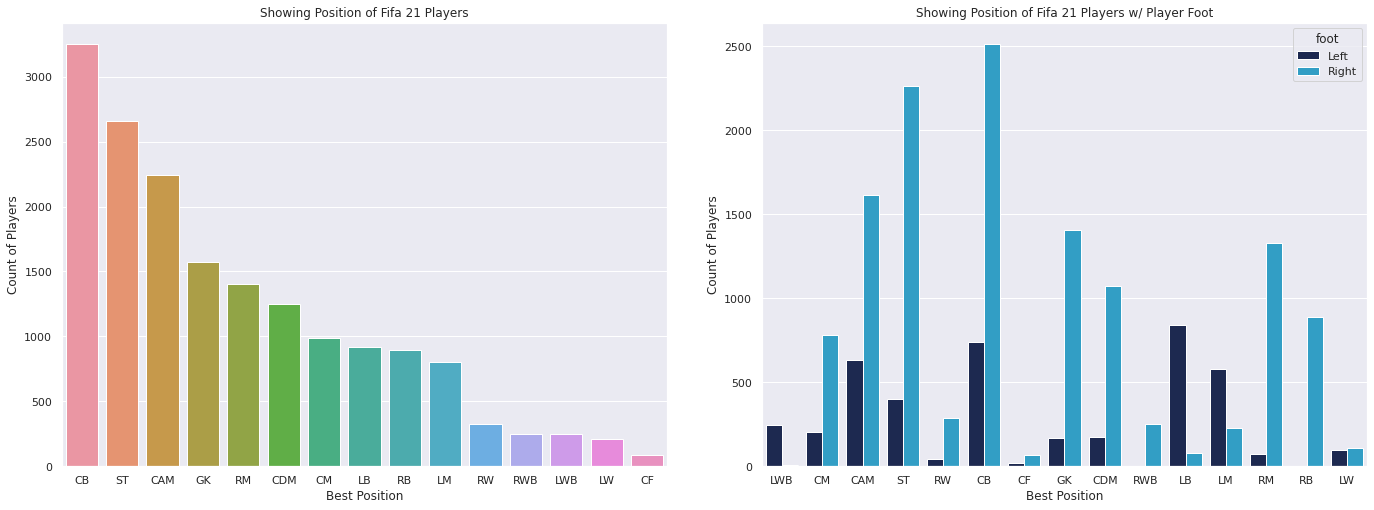

In [6]:
plt.rcParams["figure.figsize"] = (20,8)

plt.subplot(1, 2, 1)
fig = sns.countplot(x="BP", data=df, order=df["BP"].value_counts().index)
plt.xlabel("Best Position")
plt.ylabel("Count of Players")
plt.title("Showing Position of Fifa 21 Players")

plt.subplot(1, 2, 2)
fig = sns.countplot(x="BP", hue="foot", data=df, palette= ["#142459","#19AADE"])
plt.xlabel("Best Position")
plt.ylabel("Count of Players")
plt.title("Showing Position of Fifa 21 Players w/ Player Foot")

plt.tight_layout(pad=4.0)
plt.show()

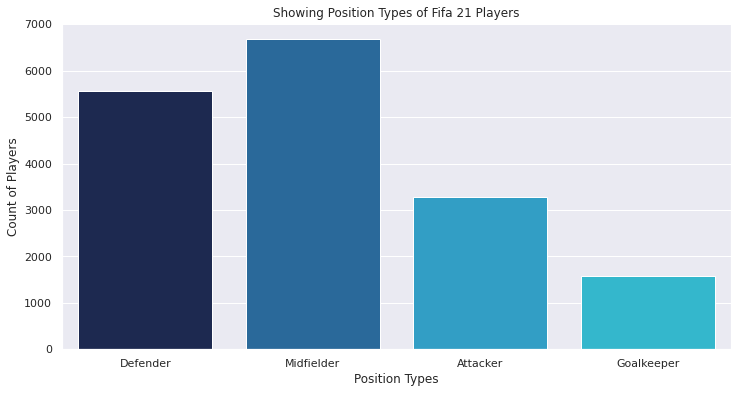

In [7]:
plt.rcParams["figure.figsize"] = (12,6)
fig = sns.countplot(data=df, x="Pos_Type", palette= ["#142459","#176BAD","#19AADE","#1AC9E6"])
plt.xlabel("Position Types")
plt.ylabel("Count of Players")
plt.title("Showing Position Types of Fifa 21 Players")

plt.show()

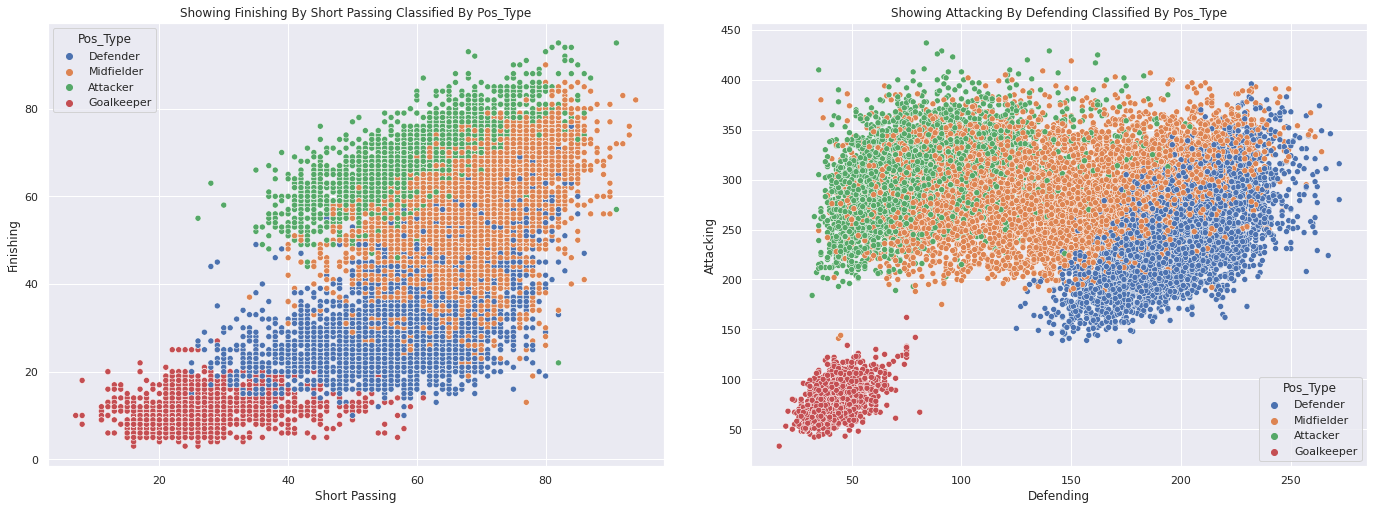

In [8]:
plt.rcParams["figure.figsize"] = (20,8)

plt.subplot(1, 2, 1)
#Scatter plot Finishing by Short Passing classified by Pos_Type
fig = sns.scatterplot(x="Short Passing", y="Finishing", hue="Pos_Type", data=df)
plt.title("Showing Finishing By Short Passing Classified By Pos_Type")

plt.subplot(1, 2, 2)
#Scatter plot Attacking by Defending classified by Pos_Type
fig = sns.scatterplot(x="Defending", y="Attacking", hue="Pos_Type", data=df)
plt.title("Showing Attacking By Defending Classified By Pos_Type")

plt.tight_layout(pad=4.0)
plt.show()

# ***Stage 2 - Determining Property / Question That May Be Suited To This Project.***

# ***Question***

> **Classifying The Postion of Players Based On Their In-Game Stats**

# ***Stage 3 - Examining The Data From The Perspective Of The Models - Pre-Process? Feature Extract? etc.***

In [9]:
train_df = train_df_copy.copy()



> **Cleaning The Data**



In [10]:
# Dropping useless columns & Positions
def columns_to_drop(df):
    cols = ['Name', 'ID', 'Age', 'Nationality', 'Club', 'Position', 'Player Photo', 'Club Logo', 'Flag Photo', 'Team & Contract','Joined', 'Loan Date End', 'Value', 'Wage', 'Release Clause', 'Contract', 'Hits', 'LS', 'ST', 'RS', 'LW', 'LF', 'CF', 'RF', 'RW', 'LAM', 'CAM', 'RAM', 'LM', 'LCM', 'CM', 'RCM', 'RM', 'LWB', 'LDM', 'CDM', 'RDM', 'RWB', 'LB', 'LCB', 'CB', 'RCB', 'RB', 'GK', 'Gender']
    return df.drop(columns=cols)
    

train_df = columns_to_drop(train_df)
test_df = columns_to_drop(test_df)

train_df.head(3)

,OVA,BOV,BP,POT,Height,Weight,foot,Growth,Attacking,Crossing,Finishing,Heading Accuracy,Short Passing,Volleys,Skill,Dribbling,Curve,FK Accuracy,Long Passing,Ball Control,Movement,Acceleration,Sprint Speed,Agility,Reactions,Balance,Power,Shot Power,Jumping,Stamina,Strength,Long Shots,Mentality,Aggression,Interceptions,Positioning,Vision,Penalties,Composure,Defending,Marking,Standing Tackle,Sliding Tackle,Goalkeeping,GK Diving,GK Handling,GK Kicking,GK Positioning,GK Reflexes,Total Stats,Base Stats,W/F,SM,A/W,D/W,IR,PAC,SHO,PAS,DRI,DEF,PHY
7877,58,59,ST,64,"6'3""",165lbs,Right,6,234,34,57,60,41,42.0,212,55,39.0,26,33,59,307,63,74,56.0,49,65.0,278,58,61.0,46,61,52,219,35,16.0,58.0,48.0,62,57.0,40,14,13,13.0,64,12,13,16,9,14,1354,292,2 ★,2★,Medium,Medium,1 ★,69,56,39,57,19,52
1722,75,75,CB,75,"6'2""",168lbs,Left,0,306,39,53,81,71,62.0,270,56,39.0,52,62,61,234,49,46,34.0,71,34.0,293,64,34.0,69,85,41,294,75,74.0,53.0,41.0,51,69.0,230,76,80,74.0,51,12,12,12,8,7,1678,363,2 ★,2★,Low,Medium,1 ★,47,53,55,55,77,76
3309,78,78,ST,78,"6'1""",172lbs,Right,0,370,65,82,77,70,76.0,347,75,75.0,58,65,74,370,79,75,74.0,78,64.0,388,78,82.0,78,81,69,350,78,49.0,81.0,72.0,70,72.0,114,25,45,44.0,54,8,10,15,6,15,1993,420,4 ★,4★,High,Medium,2 ★,77,78,68,74,43,80


In [11]:
# Replacing NaN values with the Mean value 
def change_nan_mean(df):
    for i in df.columns[df.isna().any()].tolist():
        if i == "D/W" or i == "A/W":
            df[i] =  "Medium"
        else:
            df[i].fillna(df[i].mean(), inplace=True)
    return df

train_df = change_nan_mean(train_df)
test_df = change_nan_mean(test_df)

In [12]:
# Converting Columns to numeric such as height, weight, W/F etc..

def hgt_to_cm(df):
    df['Height in ft']=pd.to_numeric(df['Height'].str[0])
    df['Height in in']=pd.to_numeric(df['Height'].str.split("\'").str[1].str.strip('"'))
    df['Height']=(df['Height in ft']*12+df['Height in in'])*2.54
    df.drop(columns=["Height in ft", "Height in in"], inplace=True)
    return df

train_df = hgt_to_cm(train_df)
test_df = hgt_to_cm(test_df)

In [13]:
# Extracting numeric characters only -> removing stars, e.g 4 star weak foot etc.
def to_num(df, columns):
    def digit(i):
        return "".join(filter(str.isdigit, i))

    for j in columns:
        df[j] = df[j].apply(digit)

    return df

train_df = to_num(train_df, ["Weight", "W/F", "SM", "IR"])
test_df = to_num(test_df, ["Weight", "W/F", "SM", "IR"])

In [14]:
# Encoding features into ints
def encColumns(df, columns):
    for i in columns:
        label_enc = LabelEncoder()
        df[i] = label_enc.fit_transform(list(df[i]))
    return df

train_df = encColumns(train_df, ["foot", "A/W", "D/W"])
test_df = encColumns(test_df, ["foot", "A/W", "D/W"])

In [15]:
train_df.head()

,OVA,BOV,BP,POT,Height,Weight,foot,Growth,Attacking,Crossing,Finishing,Heading Accuracy,Short Passing,Volleys,Skill,Dribbling,Curve,FK Accuracy,Long Passing,Ball Control,Movement,Acceleration,Sprint Speed,Agility,Reactions,Balance,Power,Shot Power,Jumping,Stamina,Strength,Long Shots,Mentality,Aggression,Interceptions,Positioning,Vision,Penalties,Composure,Defending,Marking,Standing Tackle,Sliding Tackle,Goalkeeping,GK Diving,GK Handling,GK Kicking,GK Positioning,GK Reflexes,Total Stats,Base Stats,W/F,SM,A/W,D/W,IR,PAC,SHO,PAS,DRI,DEF,PHY
7877,58,59,ST,64,190.50,165,1,6,234,34,57,60,41,42.0,212,55,39.0,26,33,59,307,63,74,56.0,49,65.0,278,58,61.0,46,61,52,219,35,16.0,58.0,48.0,62,57.0,40,14,13,13.0,64,12,13,16,9,14,1354,292,2,2,0,0,1,69,56,39,57,19,52
1722,75,75,CB,75,187.96,168,0,0,306,39,53,81,71,62.0,270,56,39.0,52,62,61,234,49,46,34.0,71,34.0,293,64,34.0,69,85,41,294,75,74.0,53.0,41.0,51,69.0,230,76,80,74.0,51,12,12,12,8,7,1678,363,2,2,0,0,1,47,53,55,55,77,76
3309,78,78,ST,78,185.42,172,1,0,370,65,82,77,70,76.0,347,75,75.0,58,65,74,370,79,75,74.0,78,64.0,388,78,82.0,78,81,69,350,78,49.0,81.0,72.0,70,72.0,114,25,45,44.0,54,8,10,15,6,15,1993,420,4,4,0,0,2,77,78,68,74,43,80
2502,69,69,RB,69,180.34,163,1,0,251,60,35,58,66,32.0,281,62,54.0,43,60,62,362,73,78,75.0,69,67.0,301,47,67.0,80,71,36,302,79,64.0,48.0,52.0,59,60.0,194,63,68,63.0,47,15,6,7,13,6,1738,377,2,2,0,0,1,76,39,59,64,64,75
13231,73,75,CB,78,193.04,187,0,5,216,37,21,71,60,27.0,211,46,27.0,30,50,58,258,55,66,34.0,71,32.0,295,45,64.0,73,88,25,255,76,71.0,31.0,38.0,39,62.0,220,72,75,73.0,46,12,6,14,9,5,1501,338,4,2,0,0,1,61,28,46,49,73,81


In [16]:
LabelEncoder_labels = LabelEncoder() # New encoder, so can inverse after evaluation
LabelEncoder_labels.fit(train_df["BP"]) 

y = LabelEncoder_labels.transform(train_df["BP"])
X = train_df.drop(columns=["BP"])

y_test = LabelEncoder_labels.transform(test_df["BP"])
X_test = test_df.drop(columns=["BP"])

# ***Stage 4 - Developing Model(s) And Training Them.***

      

To Begin, four classifiers were tested. The iteration had to be juggled a little bit because they were taking so long to run. This way the run time is much shorter, and the results remained pretty much unaffected.

In [17]:
# Machine Learning Models being tested
models= [
    ("SGD Classifier", SGDClassifier(max_iter=50)),
    ("MLP Classifier", MLPClassifier(max_iter=25)),
    ("RF Classifier", RandomForestClassifier(n_estimators=50)),
    ("KNN Classifier", KNeighborsClassifier(leaf_size=5000))]

# Creating dataframe to compare models
benchmark_cols = ["Model"]
model_benchmark = pd.DataFrame(columns=benchmark_cols)

# Setting random_state to my tNumber
kfold = model_selection.KFold(n_splits=10, shuffle=True, random_state=194460)

row_pos=0
for name, model in models:
  start_time = timer()
  model_benchmark.loc[row_pos, "Model"] = name
  model_benchmark.loc[row_pos, "Parameters"] = str(model.get_params())
  
  print ("Model: " + name)
  
  pipeline = Pipeline([("Scaler", StandardScaler()),(name, model)]) 
  
  cv_res = model_selection.cross_validate(pipeline, X, y, cv=kfold, scoring=("accuracy", "f1_micro"), n_jobs=-1)

  model_benchmark.loc[row_pos, "Accuracy Max"] = max(cv_res["test_accuracy"])
  model_benchmark.loc[row_pos, "Accuracy Mean"] = cv_res["test_accuracy"].mean()
  model_benchmark.loc[row_pos, "Accuracy SD"] = cv_res["test_accuracy"].std()

  row_pos += 1
  
  end_time = timer()
  print("Total Time: " + str(round((end_time - start_time), 2)))
  print("")
  start_time = timer()
  end_time = timer()

model_benchmark.head()

Model: SGD Classifier
Total Time: 18.38

Model: MLP Classifier
Total Time: 19.08

Model: RF Classifier
Total Time: 20.78

Model: KNN Classifier
Total Time: 15.65



,Model,Parameters,Accuracy Max,Accuracy Mean,Accuracy SD
0,SGD Classifier,"{'alpha': 0.0001, 'average': False, 'class_wei...",0.826200,0.813197,0.006596
1,MLP Classifier,"{'activation': 'relu', 'alpha': 0.0001, 'batch...",0.850097,0.831365,0.010024
2,RF Classifier,"{'bootstrap': True, 'ccp_alpha': 0.0, 'class_w...",0.780013,0.763560,0.009343
3,KNN Classifier,"{'algorithm': 'auto', 'leaf_size': 5000, 'metr...",0.720960,0.703412,0.011614


# ***Stage 5 - Evaluating, Refining And Repeating.***


Based on the Accuracy Results Above, It is clear that KNN is the weakest by quite abit. RF has the second worst accuracy and it is also quite abit behind the top 2. Therefore I think it is reasonable to remove both KNN & RF Classifiers and focus on improving SGD & MLP.

In [18]:
mlp_clf = Pipeline(steps=[
    ("Scaler", StandardScaler()),
    ("MLP", MLPClassifier(
        alpha=0.01,
        hidden_layer_sizes=12,
        learning_rate="constant",
        max_iter=500,
        solver="lbfgs",
        random_state=194460
        ))
    ])

cv_results_mlp = model_selection.cross_validate(mlp_clf, X, y, cv=kfold, scoring=("accuracy", "f1_micro"), n_jobs=-1, verbose=1)

[Parallel(n_jobs=-1)]: Using backend LokyBackend with 2 concurrent workers.
[Parallel(n_jobs=-1)]: Done  10 out of  10 | elapsed:  1.3min finished


In [19]:
print(cv_results_mlp["test_accuracy"].mean())
print(max(cv_results_mlp["test_accuracy"]))

0.8562818625532463
0.8734587929915639


In [20]:
mlp_clf.fit(X, y)

/usr/local/lib/python3.7/dist-packages/sklearn/neural_network/_multilayer_perceptron.py:470: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
  self.n_iter_ = _check_optimize_result("lbfgs", opt_res, self.max_iter)


Pipeline(memory=None,
         steps=[('Scaler',
                 StandardScaler(copy=True, with_mean=True, with_std=True)),
                ('MLP',
                 MLPClassifier(activation='relu', alpha=0.01, batch_size='auto',
                               beta_1=0.9, beta_2=0.999, early_stopping=False,
                               epsilon=1e-08, hidden_layer_sizes=12,
                               learning_rate='constant',
                               learning_rate_init=0.001, max_fun=15000,
                               max_iter=500, momentum=0.9, n_iter_no_change=10,
                               nesterovs_momentum=True, power_t=0.5,
                               random_state=194460, shuffle=True,
                               solver='lbfgs', tol=0.0001,
                               validation_fraction=0.1, verbose=False,
                               warm_start=False))],
         verbose=False)

In [21]:
y_pred = mlp_clf.predict(X_test)
y_pred_labels = LabelEncoder_labels.inverse_transform(y_pred)

y_test_labels = LabelEncoder_labels.inverse_transform(y_test)

In [22]:
accuracy_score(y_pred_labels, y_test_labels)

0.848219497956801

In [23]:
print(classification_report(y_pred_labels, y_test_labels))

              precision    recall  f1-score   support

         CAM       0.88      0.84      0.86       274
          CB       0.95      0.95      0.95       313
         CDM       0.86      0.86      0.86       122
          CF       0.18      1.00      0.31         2
          CM       0.85      0.81      0.83       100
          GK       1.00      1.00      1.00       156
          LB       0.81      0.84      0.82        92
          LM       0.65      0.67      0.66        91
          LW       0.11      0.20      0.14        10
         LWB       0.39      0.86      0.53        14
          RB       0.94      0.77      0.85        82
          RM       0.75      0.79      0.77       140
          RW       0.27      0.24      0.26        37
         RWB       0.62      0.73      0.67        22
          ST       0.95      0.90      0.93       258

    accuracy                           0.85      1713
   macro avg       0.68      0.76      0.69      1713
weighted avg       0.86   

# ***Stage 6 - Presenting Results And Conclusions.***



Overall, the results shown above are satisfactory. Some positions had issues due to the fact that its nearly an identical position as others. For Example, Left Mid (LM) and Left Wing (LW). One solution that could be done to perhaps solve this issue is group possitions like this together. It was nice to see that alot of positions scored extremely well. With an overall score of roughly 85, it would be nice to compare that to perhaps a neural network or something.
Overall, four classifiers were tested. They were then running against one another competing for a top two spot. I briefly optimized all four in order to try and get abit more out of them, which worked in most cases. Once I found the best two classifiers, I again optimized them alittle and then took the best option and performed the classification. 